## What are the most demanded

In [1]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
# dataset = load_dataset('lukebarousse/data_jobs')
# df = dataset['train'].to_pandas()

# Loading Data from CSV
df = pd.read_csv("F:\ALMACENAMIENTO\DATA ANALITYCS\carpeta_extra\job_postings_flat.csv")

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Naomi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[df['job_country'] == 'United States']

In [3]:
df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Data Analyst,sql
0,Data Analyst,snowflake
0,Data Analyst,visio
0,Data Analyst,jira
0,Data Analyst,confluence
...,...,...
1780664,Sr Data Scientist,sql
1780664,Sr Data Scientist,python
1780664,Sr Data Scientist,bigquery
1780664,Sr Data Scientist,jupyter


In [4]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [5]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

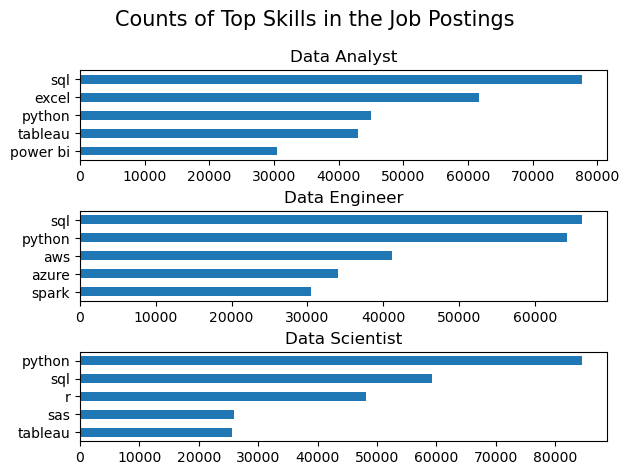

In [6]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot= df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in the Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [7]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')

In [8]:
df_skills_count

,job_skills,job_title_short,skill_count
1343,python,Data Scientist,84454
1670,sql,Data Analyst,77619
1671,sql,Data Engineer,66176
1342,python,Data Engineer,64251
509,excel,Data Analyst,61794
...,...,...,...
766,ionic,Data Scientist,1
765,ionic,Data Analyst,1
502,ember.js,Software Engineer,1
1136,nuix,Senior Data Engineer,1


In [9]:
df_skills_perc = pd.merge(df_skills_count,df_job_title_count, how='left',on='job_title_short')
df_skills_perc['skill_percent']= df_skills_perc['skill_count']/df_skills_perc['job_total']*100

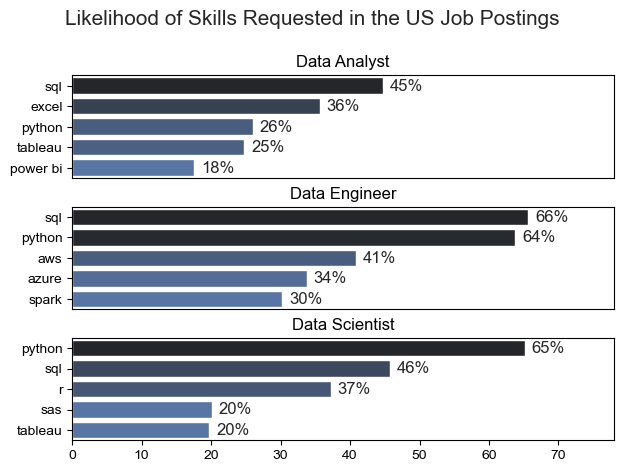

In [10]:
fig, ax = plt.subplots(len(job_titles),1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot= df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent',y='job_skills', ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_plot['skill_percent']):   # add data labels ejemplo %
        ax[i].text(v + 1,n, f'{v:.0f}%', va='center')
    
    if i !=len(job_titles) -1:  #keep x axis ticks only in the last plot
        ax[i].set_xticks([]) #remuve x axis ticks

fig.suptitle('Likelihood of Skills Requested in the US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()